In [43]:
import pandas as pd
import import_ipynb
from Neo4j import *
import matplotlib.pyplot as plt
from graph_analyser import *
from etherscan_scrapper_v0 import *
from web3 import Web3
from web3_connector_v8 import *
from sklearn import preprocessing
from name_assigment import *

importing Jupyter notebook from graph_analyser.ipynb


In [2]:
connection_url = "http://localhost:8889"
web3 = Web3(Web3.HTTPProvider(connection_url))
print(web3.isConnected())

True


In [3]:
erc20_abi = '[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_upgradedAddress","type":"address"}],"name":"deprecate","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_spender","type":"address"},{"name":"_value","type":"uint256"}],"name":"approve","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"deprecated","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_evilUser","type":"address"}],"name":"addBlackList","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_from","type":"address"},{"name":"_to","type":"address"},{"name":"_value","type":"uint256"}],"name":"transferFrom","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"upgradedAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balances","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"maximumFee","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"_totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"unpause","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_maker","type":"address"}],"name":"getBlackListStatus","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"allowed","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"paused","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"who","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"pause","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getOwner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_to","type":"address"},{"name":"_value","type":"uint256"}],"name":"transfer","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"newBasisPoints","type":"uint256"},{"name":"newMaxFee","type":"uint256"}],"name":"setParams","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"issue","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"redeem","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_owner","type":"address"},{"name":"_spender","type":"address"}],"name":"allowance","outputs":[{"name":"remaining","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"basisPointsRate","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"isBlackListed","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_clearedUser","type":"address"}],"name":"removeBlackList","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"MAX_UINT","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_blackListedUser","type":"address"}],"name":"destroyBlackFunds","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[{"name":"_initialSupply","type":"uint256"},{"name":"_name","type":"string"},{"name":"_symbol","type":"string"},{"name":"_decimals","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"amount","type":"uint256"}],"name":"Issue","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"amount","type":"uint256"}],"name":"Redeem","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"newAddress","type":"address"}],"name":"Deprecate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"feeBasisPoints","type":"uint256"},{"indexed":false,"name":"maxFee","type":"uint256"}],"name":"Params","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_blackListedUser","type":"address"},{"indexed":false,"name":"_balance","type":"uint256"}],"name":"DestroyedBlackFunds","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_user","type":"address"}],"name":"AddedBlackList","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_user","type":"address"}],"name":"RemovedBlackList","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"owner","type":"address"},{"indexed":true,"name":"spender","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[],"name":"Pause","type":"event"},{"anonymous":false,"inputs":[],"name":"Unpause","type":"event"}]'


In [4]:
usdt_contract = web3_contract('0xdac17f958d2ee523a2206206994597c13d831ec7', erc20_abi, web3)

In [21]:
conn = Neo4jConnection(uri="bolt://localhost:7687", 
                       user="neo4j",              
                       pwd="usdt")

In [44]:
dai_analyser = graph_analyser(conn, 'USDT')

USDT


In [47]:
#dai_analyser.write_pageRank_centrality_for_all_nodes()
dai_analyser.stream_pageRank_centrality_for_all_nodes()

In [214]:
dai_analyser.write_closeness_centrality_for_all_nodes()

In [227]:
dai_analyser.write_hits_centrality_for_all_nodes()

In [48]:
top_scorers = rank_named_addresses(dai_analyser.pageRank_centrality_score_by_node, "pageRankCentrality", dai_analyser)

In [45]:
balances = []
names = []
degrees = []
pageRanks = []
contracts = []
addresses = []
betweennesses = []
closenesses = []
hitsAuths = []
hitsHubs = []
for address in top_scorers[1].keys():
    addresses.append(address)
    names.append(top_scorers[1][address])
    balance = usdt_contract.get_balance(address)
    balances.append(balance)
    degree = dai_analyser.get_node_degree(address)
    degrees.append(degree)
    pageRank = dai_analyser.get_node_pageRank(address)
    pageRanks.append(pageRank)
    isContract = usdt_contract.is_contract(address)
    contracts.append(isContract)
    betweenness = dai_analyser.get_node_betweenness(address)
    betweennesses.append(betweenness)
    closeness = dai_analyser.get_node_closeness(address)
    closenesses.append(closeness)
    hits = dai_analyser.get_node_hits(address)
    hitsAuths.append(hits[0])
    hitsHubs.append(hits[1])


In [49]:
d = {'name': names,'address': addresses,'balance': balances, 'degree': degrees, 'pageRank': pageRanks, 
     'contract': contracts, 'betweenness': betweennesses, 'closeness': closenesses, 
     'hitsAuth': hitsAuths, 'hitsHub': hitsHubs }

top_addresses_df = pd.DataFrame(data = d)

In [ ]:
print(top_addresses_df[['name', 'address', 'hitsAuth', 'hitsHub']].head(50))

In [55]:
query_string = '''MATCH (p:Address)
                    RETURN p.valueshub as hitsHub, p.id as address
                    ORDER BY p.valueshub DESC
                    LIMIT 100'''
hub_nodes = dai_analyser.get_query_data(query_string)
top_scorers_hub = rank_named_addresses(hub_nodes, "hitsHub", dai_analyser)


In [56]:
print(top_scorers_hub[0].head(50))

            hitsHub
Unknown0   0.004968
Unknown1   0.004968
Unknown2   0.004968
Unknown3   0.004968
Unknown4   0.004968
Unknown5   0.004968
Unknown6   0.004968
Unknown7   0.004968
Unknown8   0.004968
Unknown9   0.004968
Unknown10  0.004968
Unknown11  0.004968
Unknown12  0.004968
Unknown13  0.004968
Unknown14  0.004968
Unknown15  0.004968
Unknown16  0.004968
Unknown17  0.004968
Unknown18  0.004968
Unknown19  0.004968
Unknown20  0.004968
Unknown21  0.004968
Unknown22  0.004968
Unknown23  0.004968
Unknown24  0.004968
Unknown25  0.004968
Unknown26  0.004968
Unknown27  0.004968
Unknown28  0.004968
Unknown29  0.004968
Unknown30  0.004968
Unknown31  0.004968
Unknown32  0.004968
Unknown33  0.004968
Unknown34  0.004968
Unknown35  0.004968
Unknown36  0.004968
Unknown37  0.004968
Unknown38  0.004968
Unknown39  0.004968
Unknown40  0.004968
Unknown41  0.004968
Unknown42  0.004968
Unknown43  0.004968
Unknown44  0.004968
Unknown45  0.004968
Unknown46  0.004968
Unknown47  0.004968
Unknown48  0.004968


In [57]:
query_string = '''MATCH (p:Address)
                    RETURN p.valuesauth as hitsAuth, p.id as address
                    ORDER BY p.valuesauth DESC
                    LIMIT 100'''
auth_nodes = dai_analyser.get_query_data(query_string)
top_scorers_auth = rank_named_addresses(auth_nodes, "hitsAuth", dai_analyser)

In [58]:
print(top_scorers_auth[0].head(50))

                                  hitsAuth
Binance 14 binance exchange   1.000000e+00
Unknown0                      2.043062e-39
Unknown1                      1.987799e-39
Unknown2                      1.979717e-39
Unknown3                      1.977545e-39
Unknown4                      1.976005e-39
Unknown5                      1.966957e-39
Unknown6                      1.966701e-39
Unknown7                      1.962844e-39
Unknown8                      1.962188e-39
Unknown9                      1.959165e-39
Unknown10                     1.957786e-39
Unknown11                     1.957190e-39
Unknown12                     1.955885e-39
Unknown13                     1.955632e-39
Unknown14                     1.955031e-39
Unknown15                     1.954000e-39
Unknown16                     1.949167e-39
Unknown17                     1.947264e-39
Unknown18                     1.946299e-39
Unknown19                     1.945276e-39
Unknown20                     1.943523e-39
Unknown21  

In [199]:
data_copy = top_addresses_df
X_train = data_copy[['balance', 'degree', 'pageRank', 'betweenness']].to_numpy()
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
X_scaled = scaler.transform(X_train)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_scaled)
for index, row in top_addresses_df.iterrows():
    print(row['name'], row['address'], kmeans.labels_[index])

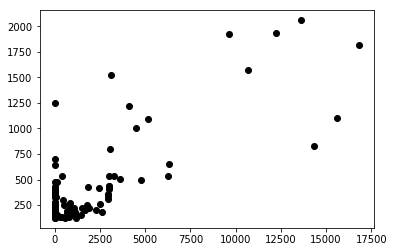

In [185]:
plt.plot(degrees[1:],pageRanks[1:], 'o', color='black')

mean 66480804.84247181
sd 230034365.18236744


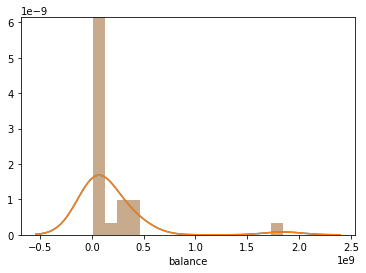

In [78]:
import seaborn as sns
balances = np.array(balances)
print("mean", np.mean(balances))
print("sd", np.std(balances))
b = pd.Series(balances[balances > 10000000], name="balance")
ax = sns.distplot(b)
sns.distplot(b)

In [27]:
print(top_scorers[0][:60])

                                   pageRankCentrality
Binance 14 binance exchange              10585.173003
Binance 17 binance exchange               2058.977882
Binance 18 binance exchange               1938.946655
Binance 16 binance exchange               1921.900799
Unknown0                                  1819.394832
Binance 15 binance exchange               1570.295669
Huobi 2                                   1522.814274
Unknown1                                  1246.648684
Kraken 7 kraken exchange                  1222.443670
Coinbase 4 coinbase                       1107.497106
Unknown2                                  1097.490009
FTX Exchange                              1001.445817
Coinbase 5 coinbase                        833.212494
Huobi 3                                    801.042979
Unknown3                                   700.893666
Uniswap V2: USDT 2                         653.058156
Unknown4                                   645.751993
Bitfinex 3                  

In [10]:
def name_of_addresses_in_list(community_addresses, analyser):
    
    
    address_owners = {}
    url_start = "https://etherscan.io/address/"
        
    # cleaning address owner data
    clean_owners = {}
    count_unknown = 0
    for address in community_addresses:

        if(str(analyser.get_node_name(address)[0]) == "None"):
            
            parser = etherscanParser("https://etherscan.io/address/" + address)
            address_owners[address] = {}
            address_owners[address]['href'] = parser.get_labels_through_href() 
            address_owners[address]['title'] = parser.get_public_address_tag() 
            
            if "Address" not in address_owners[address]['title'] and 'Ethereum Accoun' not in address_owners[address]['title'] and address_owners[address]['href'] != '' and 'Ethereum BlockChain Explorer' not in address_owners[address]['title']:
                clean_owners[address] = address_owners[address]['title'] + " " + address_owners[address]['href']
            elif "Address" not in address_owners[address]['title'] and 'Ethereum Accoun' not in address_owners[address]['title'] and 'Ethereum BlockChain Explorer' not in address_owners[address]['title']:
                clean_owners[address] = address_owners[address]['title']
            elif address_owners[address]['href'] != '':
                clean_owners[address] = address_owners[address]['href']
            else:
                clean_owners[address] = "Unknown" + str(count_unknown)
                count_unknown += 1
            print(address)
            print(clean_owners[address])
    
        else:
            clean_owners[address] = str(analyser.get_node_name(address)[0])
            print(address)
            print(clean_owners[address])
    return clean_owners

In [28]:
ppr_for_top_nodes = {}
for address in top_scorers[1].keys():
    ppr_for_top_nodes[address] = dai_analyser.calculate_personalised_pageRank_for_node(address)
    

In [13]:
print(ppr_for_top_nodes['0x876eabf441b2ee5b5b0554fd502a8e0600950cfa'].head(10))

                           name     score  \
0                    Bitfinex 3  0.152379   
1                          None  0.030587   
2                          None  0.027683   
3                          None  0.020481   
4  Binance 14 binance exchange   0.017721   
5                          None  0.017409   
6                          None  0.016312   
7                        Peatio  0.014149   
8                          None  0.011591   
9                          None  0.009760   

                                      address  
0  0x876eabf441b2ee5b5b0554fd502a8e0600950cfa  
1  0x852ee2400c61943c80767c212ad2e2a754d1c449  
2  0x5041ed759dd4afc3a72b8192c143f72f4724081a  
3  0x38b78904a6b44f63eb81d98937fc6614870cfbb9  
4  0x28c6c06298d514db089934071355e5743bf21d60  
5  0x3a9e6cf4e3157670a3b991c25d6f4fcbd9419c03  
6  0x40db2f894eecec3318eafcfe852c4dd4d43f2333  
7  0xd4dcd2459bb78d7a645aa7e196857d421b10d93f  
8  0x4c8787a7aa5699a73ef7249d82fc81b02e2bee8c  
9  0x4b9c8e40b34945cf7ca

In [30]:
ppr_node = ppr_for_top_nodes['0x876eabf441b2ee5b5b0554fd502a8e0600950cfa'].head(10)
pr_centrality_scores= dai_analyser.pageRank_centrality_score_by_node.set_index('address')["pageRankCentrality"].to_dict()
for index, row in ppr_node.iterrows():
    print(row['address'], pr_centrality_scores[row['address']])

0x876eabf441b2ee5b5b0554fd502a8e0600950cfa 536.2908040189387
0x852ee2400c61943c80767c212ad2e2a754d1c449 109.14892311533016
0x5041ed759dd4afc3a72b8192c143f72f4724081a 1097.4900088644933
0x38b78904a6b44f63eb81d98937fc6614870cfbb9 128.66661181466765
0x28c6c06298d514db089934071355e5743bf21d60 10585.173003078175
0x3a9e6cf4e3157670a3b991c25d6f4fcbd9419c03 109.51662004221713
0x40db2f894eecec3318eafcfe852c4dd4d43f2333 57.55946786176333
0xd4dcd2459bb78d7a645aa7e196857d421b10d93f 55.07725886208129
0x4c8787a7aa5699a73ef7249d82fc81b02e2bee8c 44.51102647659205
0x4b9c8e40b34945cf7cabc94ecc454f812882ad4d 37.63106519871222


In [112]:
# find all shortests paths for all pairs
l =[]
shortest_paths_of_top_nodes = np.array(l)
for address1 in top_scorers[1].keys():
    for address2 in top_scorers[1].keys():
        if(address1 != address2):
            shortest_paths_of_top_nodes = np.append(shortest_paths_of_top_nodes, dai_analyser.find_all_shortest_paths(address1, address2))

shortest_paths_of_top_nodes_flat = shortest_paths_of_top_nodes.flatten()

In [102]:
print(shortest_paths_of_top_nodes)

0xaeeb5d27ddde0ec03c869b21fb66ccdbe556fc21


In [113]:
import statistics as s

unique, pos, counts = np.unique(shortest_paths_of_top_nodes_flat,return_inverse=True, return_counts = True)
#counts = np.bincount(pos)
print(counts[:10])
mode = s.mode(shortest_paths_of_top_nodes_flat)
print(mode)

[1 4 5 1 1 1 1 1 2 1]
0x28c6c06298d514db089934071355e5743bf21d60


In [114]:
owners = []
for address in unique:
    if(address in top_scorers[1].keys()):
        owners.append(top_scorers[1][address])
    else:
        owners.append('none')
        
d = {'address': unique,'owner': owners, 'count': counts}
most_frequent_connector_nodes_df = pd.DataFrame(data = d)
df_sorted = most_frequent_connector_nodes_df.sort_values(by=['count'], ascending = False)
print(df_sorted.head(50))

                                          address  \
5812   0x28c6c06298d514db089934071355e5743bf21d60   
3147   0x1611c227725c5e420ef058275ae772b41775e261   
16194  0x71ad672933ad372c2f60bbdd0d8a16e2098da1e9   
20436  0x8ebcfe68a33f02e19340b40ec0d6b6c043bde7f7   
23757  0xa5d07e978398eb1715056d3ca5cb31035c02fdad   
12306  0x5620cbd6626669953e302ebe68608e0bc1c1b206   
6155   0x2b078a13487f160dcb0099df70940a898aacfe81   
3494   0x1872c1bbb51c9d1129420f8baa4e6b7ddef79dfb   
28004  0xc333e80ef2dec2805f239e3f1e810612d294f771   
23117  0xa176d42454d5af743c771cb3545a118d8a1aba95   
35849  0xfa103c21ea2df71dfb92b0652f8b1d795e51cdef   
34142  0xee8e0fcc8bff03ec5f100d02cb7b3196d78863a7   
24006  0xa78d2c69b34cab96cace31967afe52013dfcb604   
10181  0x47294092daeafc531860a357346502fc3bc70f58   
1137   0x07c5852b856da3f3453cda228b686c2b65199fd7   
24318  0xa99c4f924a167cdec1486aa9920de70a48455ab2   
27378  0xbf1674317963d99597e9a9fe8d883fe9b62201b4   
33723  0xeb9304472a3c23ef98ebc925d5376615e789e

In [46]:
all_ppr_addresses = []
all_ppr_addresses = np.array(all_ppr_addresses)
for address in ppr_for_top_nodes.keys():
    all_ppr_addresses = np.append(all_ppr_addresses, ppr_for_top_nodes[address]['address'][1:])

In [47]:
unique_ppr_addresses = np.unique(all_ppr_addresses)
print(len(unique_ppr_addresses))

191481


In [67]:

address_to_index = {}
for count, address in enumerate(unique_ppr_addresses):
    address_to_index[address] = count

address_to_ppr_scores = {}
for address in ppr_for_top_nodes.keys():
    ppr_scores = np.zeros(len(unique_ppr_addresses))
    for index, row in ppr_for_top_nodes[address].iterrows():
         ppr_scores[address_to_index[address]] = row['score']
    address_to_ppr_scores[address] = ppr_scores
    print(len(ppr_scores))

191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481
191481


In [68]:
addresses = []
ppr_data = np.zeros((len(ppr_for_top_nodes.keys()), unique_ppr_addresses.size))
count = 0
print(len(ppr_for_top_nodes.keys()))
for address in address_to_ppr_scores.keys():
    
    addresses.append(address)
    ppr_data[count] = address_to_ppr_scores[address]
    count += 1
    

75


In [69]:
correlation_matrix = np.corrcoef(ppr_data)
print(correlation_matrix.shape)
corr_df = pd.DataFrame(correlation_matrix, columns = addresses, index = addresses)
print(corr_df)

(75, 75)
                                            0x28c6c06298d514db089934071355e5743bf21d60  \
0x28c6c06298d514db089934071355e5743bf21d60                                    1.000000   
0x56eddb7aa87536c09ccc2793473599fd21a8b17f                                   -0.000005   
0x9696f59e4d72e237be84ffd425dcad154bf96976                                   -0.000005   
0xdfd5293d8e347dfe59e90efd55b2956a1343963d                                   -0.000005   
0xe59cd29be3be4461d79c0881d238cbe87d64595a                                   -0.000005   
...                                                                                ...   
0xffec0067f5a79cff07527f63d83dd5462ccf8ba4                                   -0.000005   
0x241a260e270392cfd878657c6951f19661ae7749                                   -0.000005   
0xa23b4feaff267efdc57aa711c01aee79e257b2dc                                   -0.000005   
0x2967a359f5e82939e32e1f5a0de032d237d28438                                   -0.000005   
0

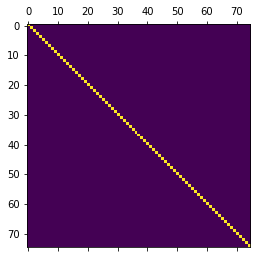

In [70]:

plt.matshow(corr_df)
plt.show()

In [72]:
# only top pprs

all_ppr_addresses = []
all_ppr_addresses = np.array(all_ppr_addresses)
for address in ppr_for_top_nodes.keys():
    all_ppr_addresses = np.append(all_ppr_addresses, ppr_for_top_nodes[address]['address'][:10])


unique_ppr_addresses = np.unique(all_ppr_addresses)
print(len(unique_ppr_addresses))

address_to_index = {}
for count, address in enumerate(unique_ppr_addresses):
    address_to_index[address] = count

address_to_ppr_scores = {}
for address in ppr_for_top_nodes.keys():
    ppr_scores = np.zeros(len(unique_ppr_addresses))
    for index, row in ppr_for_top_nodes[address].iterrows():
        if address != row['address']:
            ppr_scores[address_to_index[address]] = row['score']
            
    address_to_ppr_scores[address] = ppr_scores
    print(len(ppr_scores))
    
addresses = []
ppr_data = np.zeros((len(ppr_for_top_nodes.keys()), unique_ppr_addresses.size))
count = 0
print(len(ppr_for_top_nodes.keys()))
for address in address_to_ppr_scores.keys():
    
    addresses.append(address)
    ppr_data[count] = address_to_ppr_scores[address]
    count += 1

183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
75


In [95]:
correlation_matrix = np.cov(ppr_data)
print(correlation_matrix.shape)
corr_df = pd.DataFrame(correlation_matrix, columns = addresses, index = addresses)
print(corr_df)


(75, 75)
                                            0x28c6c06298d514db089934071355e5743bf21d60  \
0x28c6c06298d514db089934071355e5743bf21d60                               9.644514e-144   
0x56eddb7aa87536c09ccc2793473599fd21a8b17f                              -6.418378e-146   
0x9696f59e4d72e237be84ffd425dcad154bf96976                              -8.318293e-146   
0xdfd5293d8e347dfe59e90efd55b2956a1343963d                              -1.504627e-145   
0xe59cd29be3be4461d79c0881d238cbe87d64595a                              -1.481633e-145   
...                                                                                ...   
0xffec0067f5a79cff07527f63d83dd5462ccf8ba4                              -4.525867e-145   
0x241a260e270392cfd878657c6951f19661ae7749                              -4.504306e-146   
0xa23b4feaff267efdc57aa711c01aee79e257b2dc                              -4.774350e-145   
0x2967a359f5e82939e32e1f5a0de032d237d28438                              -1.816186e-105   
0

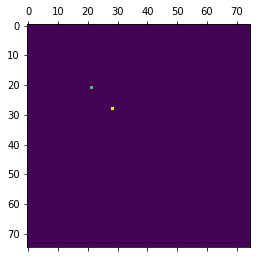

In [96]:

plt.matshow(corr_df)
plt.show()

In [94]:
#print(corr_df['0x28c6c06298d514db089934071355e5743bf21d60'])
#print(corr_df['0x28c6c06298d514db089934071355e5743bf21d60'].idxmax())
for index, row in corr_df['0x28c6c06298d514db089934071355e5743bf21d60'].iteritems():
    if row > (-0.005495):
        print(row, index)

1.0 0x28c6c06298d514db089934071355e5743bf21d60
-0.0054945054945054715 0x56eddb7aa87536c09ccc2793473599fd21a8b17f
-0.0054945054945055 0x9696f59e4d72e237be84ffd425dcad154bf96976
-0.005494505494505493 0xdfd5293d8e347dfe59e90efd55b2956a1343963d
-0.0054945054945054915 0xe59cd29be3be4461d79c0881d238cbe87d64595a
-0.00549450549450546 0x21a31ee1afc51d94c2efccaa2092ad1028285549
-0.0054945054945054715 0x6748f50f686bfbca6fe8ad62b22228b87f31ff2b
-0.005494505494505476 0xc62e1302c60a6bfddfbd8c7a0ad4e70da44950c0
-0.005494505494505485 0x89e51fa8ca5d66cd220baed62ed01e8951aa7c40
-0.005494505494505471 0x3cd751e6b0078be393132286c442345e5dc49699
-0.005494505494505464 0x5041ed759dd4afc3a72b8192c143f72f4724081a
-0.005494505494505517 0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2
-0.005494505494505518 0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511
-0.005494505494505476 0xfdb16996831753d5331ff813c29a93c76834a0ad
-0.0054945054945054915 0xfa103c21ea2df71dfb92b0652f8b1d795e51cdef
-0.0054945054945054524 0x0d4a11d5eeaac28ec